<a href="https://colab.research.google.com/github/Vidhurathi045056/MLM-2/blob/main/MLM2_045056.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.cluster import DBSCAN, KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('flare')
results= []

In [2]:
data = pd.read_csv('/content/50000 Sales Records.csv')

# Data Exploration

In [3]:
data.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Sub-Saharan Africa,Namibia,Household,Offline,M,8/31/2015,897751939,10/12/2015,3604,668.27,502.54,2408445.08,1811154.16,597290.92
1,Europe,Iceland,Baby Food,Online,H,11/20/2010,599480426,1/9/2011,8435,255.28,159.42,2153286.80,1344707.70,808579.10
2,Europe,Russia,Meat,Online,L,6/22/2017,538911855,6/25/2017,4848,421.89,364.69,2045322.72,1768017.12,277305.60
3,Europe,Moldova,Meat,Online,L,2/28/2012,459845054,3/20/2012,7225,421.89,364.69,3048155.25,2634885.25,413270.00
4,Europe,Malta,Cereal,Online,M,8/12/2010,626391351,9/13/2010,1975,205.70,117.11,406257.50,231292.25,174965.25


In [4]:
data.describe()

,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,5.000000e+04,50000.00000,50000.000000,50000.000000,5.000000e+04,5.000000e+04,5.000000e+04
mean,5.497330e+08,4999.61898,265.651350,187.322482,1.323716e+06,9.331574e+05,3.905587e+05
std,2.609179e+08,2884.33508,216.916752,175.580570,1.463891e+06,1.145548e+06,3.777588e+05
min,1.000132e+08,1.00000,9.330000,6.920000,2.799000e+01,2.076000e+01,7.230000e+00
25%,3.240070e+08,2498.00000,81.730000,35.840000,2.764871e+05,1.606370e+05,9.415092e+04
50%,5.504224e+08,5017.50000,154.060000,97.440000,7.813247e+05,4.671040e+05,2.795364e+05
75%,7.767824e+08,7493.25000,421.890000,263.330000,1.808642e+06,1.190390e+06,5.642867e+05
max,9.999995e+08,10000.00000,668.270000,524.960000,6.682032e+06,5.249075e+06,1.738178e+06


In [5]:
data.isnull().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

In [6]:
data.duplicated().any()

False

In [7]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Load your dataset
# Assuming your dataset is in a CSV file named 'your_dataset.csv'
df = pd.read_csv('/content/50000 Sales Records.csv')

# Select non-categorical columns for imputation
non_categorical_columns = ['Units Sold', 'Unit Price', 'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit']

# Create a SimpleImputer with strategy='mean'
imputer = SimpleImputer(strategy='mean')

# Impute missing values in non-categorical columns
df[non_categorical_columns] = imputer.fit_transform(df[non_categorical_columns])

# Display the DataFrame with imputed values
print(df)

                                  Region             Country        Item Type  \
0                     Sub-Saharan Africa             Namibia        Household   
1                                 Europe             Iceland        Baby Food   
2                                 Europe              Russia             Meat   
3                                 Europe            Moldova              Meat   
4                                 Europe               Malta           Cereal   
...                                  ...                 ...              ...   
49995  Central America and the Caribbean  Dominican Republic        Baby Food   
49996  Central America and the Caribbean                Cuba  Office Supplies   
49997                               Asia             Vietnam    Personal Care   
49998                 Sub-Saharan Africa        Sierra Leone          Clothes   
49999                 Sub-Saharan Africa             Eritrea       Vegetables   

      Sales Channel Order P

In [11]:
import pandas as pd

# Load your dataset
# Assuming your dataset is in a CSV file named 'your_dataset.csv'
df = pd.read_csv('/content/50000 Sales Records.csv')

# Select relevant columns for dropping NaN or blank values
columns_to_clean = ['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
                    'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
                    'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit']

# Drop rows with NaN or blank values in specified columns
df_cleaned = df.dropna(subset=columns_to_clean)

# If you have blank values represented as empty strings, you can drop those as well
df_cleaned = df_cleaned.replace(r'^\s*$', pd.NA, regex=True).dropna(subset=columns_to_clean)

# Now, df_cleaned contains the DataFrame with rows dropped for NaN or blank values in specified columns

# Optional: Check the cleaned DataFrame
print(df_cleaned)

                                  Region             Country        Item Type  \
0                     Sub-Saharan Africa             Namibia        Household   
1                                 Europe             Iceland        Baby Food   
2                                 Europe              Russia             Meat   
3                                 Europe            Moldova              Meat   
4                                 Europe               Malta           Cereal   
...                                  ...                 ...              ...   
49995  Central America and the Caribbean  Dominican Republic        Baby Food   
49996  Central America and the Caribbean                Cuba  Office Supplies   
49997                               Asia             Vietnam    Personal Care   
49998                 Sub-Saharan Africa        Sierra Leone          Clothes   
49999                 Sub-Saharan Africa             Eritrea       Vegetables   

      Sales Channel Order P

# Data visualization

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster as cluster
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler
import time
%matplotlib inline
sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}
start_time = time.time()
end_time = time.time()
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv(r'/content/50000 Sales Records.csv')

In [ ]:
data.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Sub-Saharan Africa,Namibia,Household,Offline,M,8/31/2015,897751939,10/12/2015,3604,668.27,502.54,2408445.08,1811154.16,597290.92
1,Europe,Iceland,Baby Food,Online,H,11/20/2010,599480426,1/9/2011,8435,255.28,159.42,2153286.80,1344707.70,808579.10
2,Europe,Russia,Meat,Online,L,6/22/2017,538911855,6/25/2017,4848,421.89,364.69,2045322.72,1768017.12,277305.60
3,Europe,Moldova,Meat,Online,L,2/28/2012,459845054,3/20/2012,7225,421.89,364.69,3048155.25,2634885.25,413270.00
4,Europe,Malta,Cereal,Online,M,8/12/2010,626391351,9/13/2010,1975,205.70,117.11,406257.50,231292.25,174965.25


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          50000 non-null  object 
 1   Country         50000 non-null  object 
 2   Item Type       50000 non-null  object 
 3   Sales Channel   50000 non-null  object 
 4   Order Priority  50000 non-null  object 
 5   Order Date      50000 non-null  object 
 6   Order ID        50000 non-null  int64  
 7   Ship Date       50000 non-null  object 
 8   Units Sold      50000 non-null  int64  
 9   Unit Price      50000 non-null  float64
 10  Unit Cost       50000 non-null  float64
 11  Total Revenue   50000 non-null  float64
 12  Total Cost      50000 non-null  float64
 13  Total Profit    50000 non-null  float64
dtypes: float64(5), int64(2), object(7)
memory usage: 5.3+ MB


In [ ]:
data.nunique()

Region                7
Country             185
Item Type            12
Sales Channel         2
Order Priority        4
Order Date         2766
Order ID          50000
Ship Date          2811
Units Sold         9943
Unit Price           12
Unit Cost            12
Total Revenue     41172
Total Cost        41154
Total Profit      41163
dtype: int64

In [ ]:
data.index

RangeIndex(start=0, stop=50000, step=1)

In [ ]:
data_num = data.drop(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority', 'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price', 'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit'], axis=1)
data_num.head()


""
0
1
2
3
4


In [ ]:
data_num.shape

(50000, 0)

In [ ]:
random_sample = data_num.sample(n=10000, random_state=42).reset_index(drop=True)
data_num = random_sample

# K Means Clustering codes and graph

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-4-ae88fb12e03a>:29: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_composition = df.groupby('Cluster').mean()


Computation Time: 1.33 seconds

Cluster Sizes:
 1    32047
2    11907
0     6046
Name: Cluster, dtype: int64

Cluster Composition:
              Order ID   Units Sold  Unit Price   Unit Cost  Total Revenue  \
Cluster                                                                     
0        5.513864e+08  7891.172676  587.693336  453.656649   4.568105e+06   
1        5.497852e+08  4042.560770  160.981316  104.625616   4.577547e+05   
2        5.487531e+08  6107.245654  383.841890  274.660192   2.007002e+06   

           Total Cost  Total Profit  
Cluster                              
0        3.520343e+06  1.047762e+06  
1        2.758443e+05  1.819104e+05  
2        1.388586e+06  6.184164e+05  

Silhouette Score: 0.6102
Davies-Bouldin Score: 0.5748


<ipython-input-4-ae88fb12e03a>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cluster', data=df, palette='viridis')


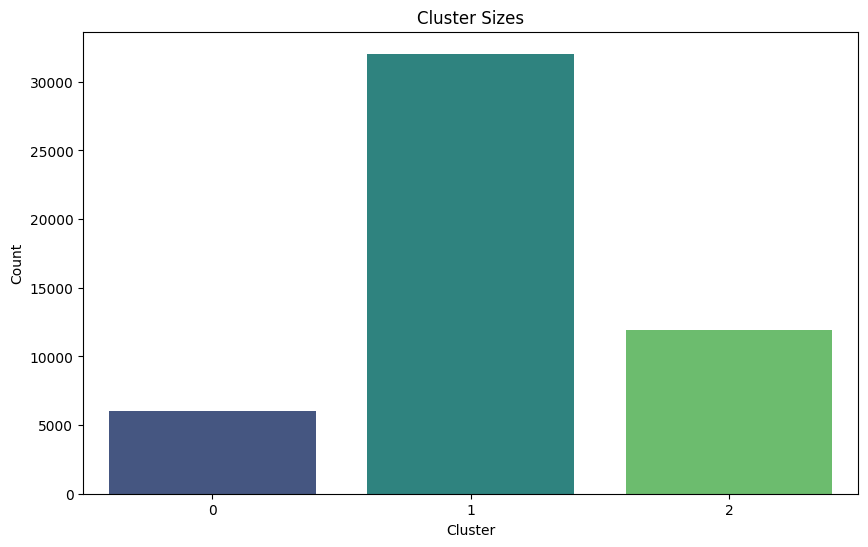

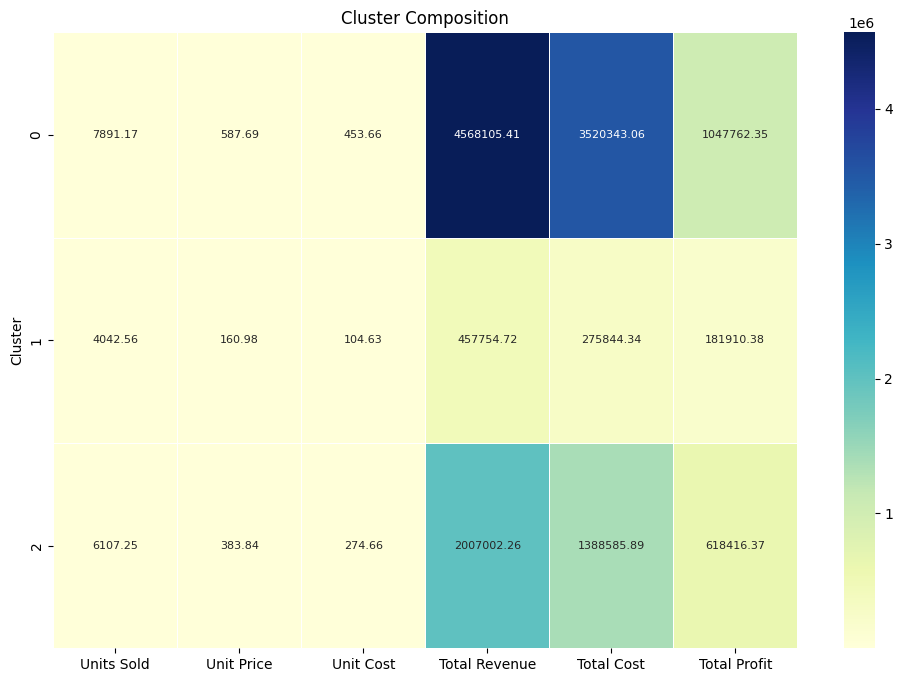

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import time
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
# Assuming your dataset is in a CSV file named 'your_dataset.csv'
df = pd.read_csv('/content/50000 Sales Records.csv')

# Select relevant columns for clustering
columns_for_clustering = ['Units Sold', 'Unit Price', 'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit']

# Extract features for clustering
X = df[columns_for_clustering]

# Specify the number of clusters (you can adjust this)
k = 3

# Perform k-means clustering
start_time = time.time()
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)
computation_time = time.time() - start_time

# Fetch cluster details
cluster_sizes = df['Cluster'].value_counts()
cluster_composition = df.groupby('Cluster').mean()

# Calculate Silhouette Score and Davies-Bouldin Score
silhouette = silhouette_score(X, df['Cluster'])
davies_bouldin = davies_bouldin_score(X, df['Cluster'])

# Print cluster details
print("Computation Time: {:.2f} seconds".format(computation_time))
print("\nCluster Sizes:\n", cluster_sizes)
print("\nCluster Composition:\n", cluster_composition)
print("\nSilhouette Score: {:.4f}".format(silhouette))
print("Davies-Bouldin Score: {:.4f}".format(davies_bouldin))

# Save cluster details to a CSV file
cluster_sizes.to_csv('cluster_sizes.csv')
cluster_composition.to_csv('cluster_composition.csv')

# Plot cluster sizes
plt.figure(figsize=(10, 6))
sns.countplot(x='Cluster', data=df, palette='viridis')
plt.title('Cluster Sizes')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

# Plot refined cluster composition with reduced font size
plt.figure(figsize=(12, 8))
sns.heatmap(cluster_composition[columns_for_clustering], annot=True, cmap='YlGnBu', fmt=".2f", linewidths=.5, annot_kws={"size": 8})
plt.title('Cluster Composition')
plt.show()


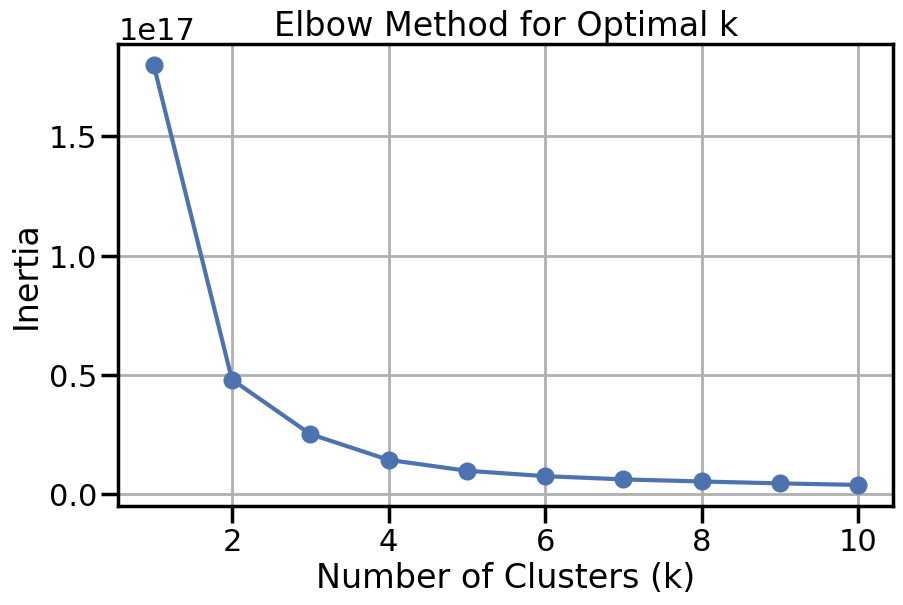

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load your dataset
# Assuming your dataset is in a CSV file named 'your_dataset.csv'
df = pd.read_csv('/content/50000 Sales Records.csv')

# Select relevant columns for clustering
columns_for_clustering = ['Units Sold', 'Unit Price', 'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit']

# Extract features for clustering
X = df[columns_for_clustering]

# Initialize a list to store the inertia values (within-cluster sum of squares)
inertia_values = []

# Try different values of k (number of clusters)
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia_values, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


# Principal Component Analysis with Kmeans

Explained Variance Ratio: [0.70828311 0.22661295]


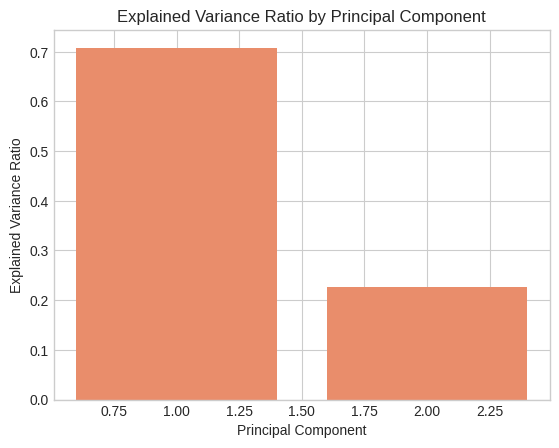

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


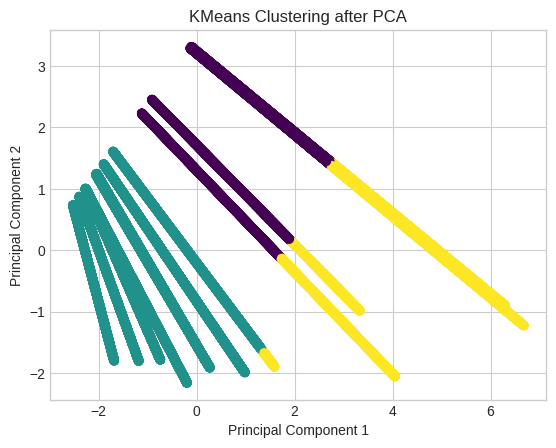

In [10]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load your dataset
# Assuming your dataset is in a CSV file named 'your_dataset.csv'
df = pd.read_csv('/content/50000 Sales Records.csv')

# Select relevant columns for analysis
columns_for_analysis = ['Units Sold', 'Unit Price', 'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit']

# Extract features for clustering
X = df[columns_for_analysis]

# Standardize the data (optional but recommended for PCA)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA to reduce dimensionality
n_components = 2  # You can adjust the number of components
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

# Visualize the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

# Plot the explained variance ratio
plt.bar(range(1, n_components + 1), explained_variance_ratio)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Component')
plt.show()

# Perform KMeans clustering on the reduced data
k = 3  # You can adjust the number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_pca)

# Visualize the clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster'], cmap='viridis')
plt.title('KMeans Clustering after PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


# Spectral clustering codes and graphs

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Computation Time: 7.21 seconds

Cluster Sizes:
 0    4996
2       2
1       2
Name: Cluster, dtype: int64

Cluster Composition:
          Units Sold  Unit Price   Unit Cost  Total Revenue     Total Cost  \
Cluster                                                                     
0        5027.86309  264.767306  187.041075   1.338013e+06  945474.487556   
1        2643.00000    9.330000    6.920000   2.465919e+04   18289.560000   
2        3179.00000    9.330000    6.920000   2.966007e+04   21998.680000   

          Total Profit  
Cluster                 
0        392538.742946  
1          6369.630000  
2          7661.390000  

Silhouette Score: -0.3127
Davies-Bouldin Score: 0.8947


<ipython-input-3-1d2da054fee3>:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cluster', data=df_subset, palette='viridis')


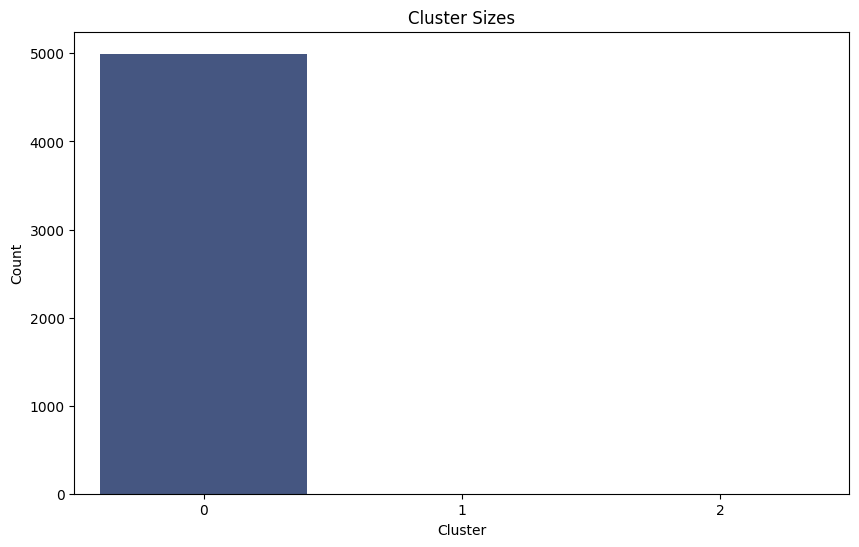

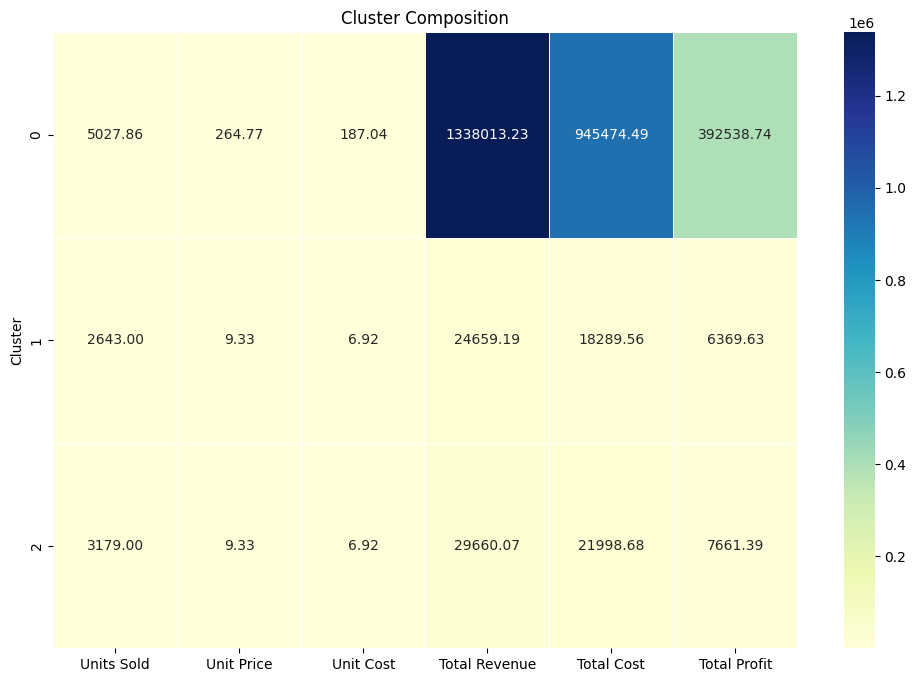

In [ ]:
import pandas as pd
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
import time
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
# Assuming your dataset is in a CSV file named 'your_dataset.csv'
df = pd.read_csv('/content/50000 Sales Records.csv')

# Select relevant columns for clustering
columns_for_clustering = ['Units Sold', 'Unit Price', 'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit']

# Extract features for clustering
X = df[columns_for_clustering]

# Take a subset of the data (adjust this based on your available memory)
subset_size = 5000
X_subset = X.sample(n=subset_size, random_state=42)

# Specify the number of clusters (you can adjust this)
n_clusters = 3

# Perform spectral clustering
start_time = time.time()
spectral = SpectralClustering(n_clusters=n_clusters, random_state=42, n_jobs=-1)
df_subset = X_subset.copy()
df_subset['Cluster'] = spectral.fit_predict(X_subset)
computation_time = time.time() - start_time

# Fetch cluster details
cluster_sizes = df_subset['Cluster'].value_counts()
cluster_composition = df_subset.groupby('Cluster').mean()

# Calculate Silhouette Score and Davies-Bouldin Score
silhouette = silhouette_score(X_subset, df_subset['Cluster'])
davies_bouldin = davies_bouldin_score(X_subset, df_subset['Cluster'])

# Print cluster details
print("Computation Time: {:.2f} seconds".format(computation_time))
print("\nCluster Sizes:\n", cluster_sizes)
print("\nCluster Composition:\n", cluster_composition)
print("\nSilhouette Score: {:.4f}".format(silhouette))
print("Davies-Bouldin Score: {:.4f}".format(davies_bouldin))

# Plot cluster sizes
plt.figure(figsize=(10, 6))
sns.countplot(x='Cluster', data=df_subset, palette='viridis')
plt.title('Cluster Sizes')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

# Plot cluster composition
plt.figure(figsize=(12, 8))
sns.heatmap(cluster_composition[columns_for_clustering], annot=True, cmap='YlGnBu', fmt=".2f", linewidths=.5)
plt.title('Cluster Composition')
plt.show()


# Agglomerative Hierarchical Clustering Codes and Graph

Computation Time: 0.87 seconds

Cluster Sizes:
 1    3054
2    1207
0     739
Name: Cluster, dtype: int64

Cluster Composition:
           Units Sold  Unit Price   Unit Cost  Total Revenue    Total Cost  \
Cluster                                                                     
0        7598.955345  582.636698  451.147997   4.363352e+06  3.371987e+06   
1        3994.319908  151.623684   97.723091   4.230220e+05  2.513481e+05   
2        6061.778790  355.582046  250.737531   1.796517e+06  1.213054e+06   

          Total Profit  
Cluster                 
0        991364.754357  
1        171673.924411  
2        583463.880017  

Silhouette Score: 0.6018
Davies-Bouldin Score: 0.5622


<ipython-input-2-59ccdf96d5a2>:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cluster', data=df_subset, palette='viridis')


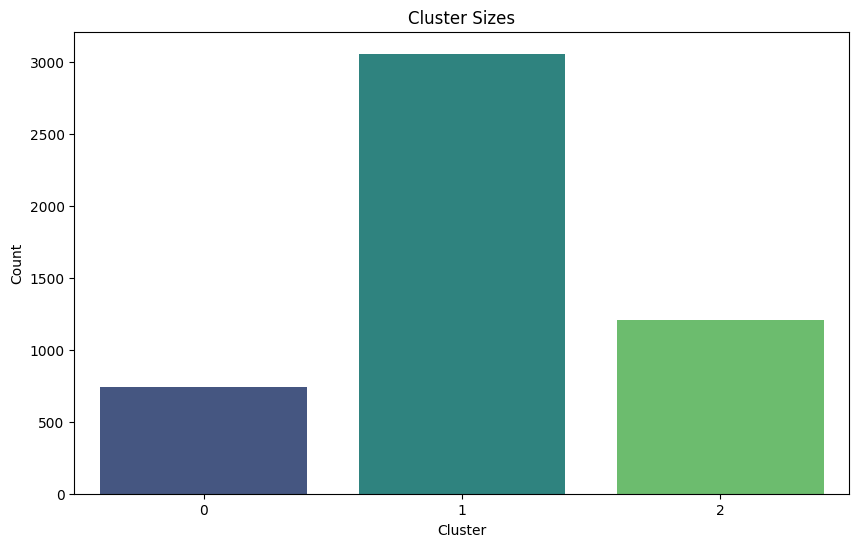

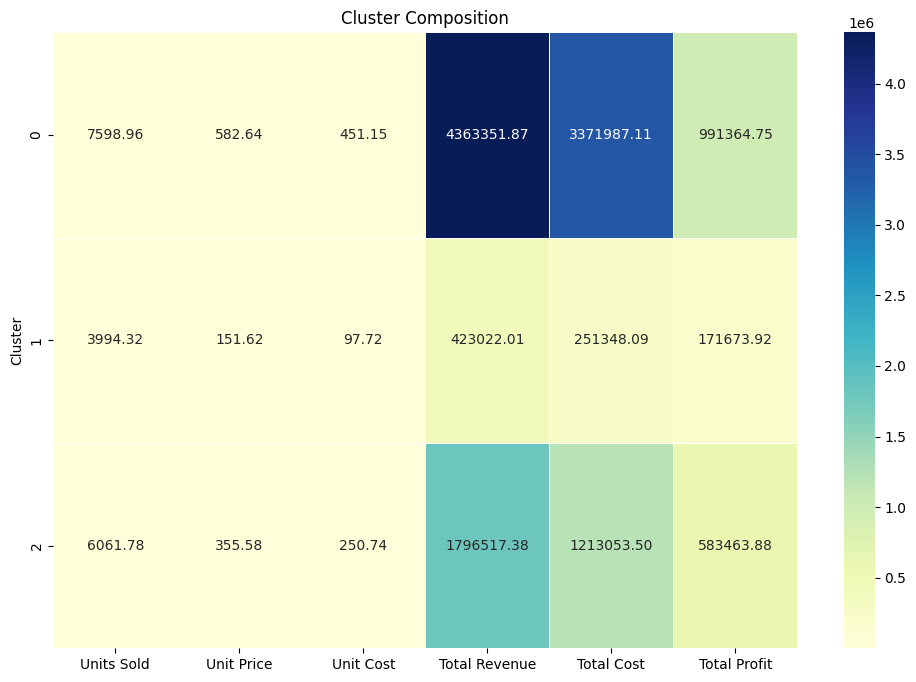

In [ ]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
import time
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
# Assuming your dataset is in a CSV file named 'your_dataset.csv'
df = pd.read_csv('/content/50000 Sales Records.csv')

# Select relevant columns for clustering
columns_for_clustering = ['Units Sold', 'Unit Price', 'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit']

# Extract features for clustering
X = df[columns_for_clustering]

# Take a subset of the data (adjust this based on your available memory)
subset_size = 5000
X_subset = X.sample(n=subset_size, random_state=42)

# Specify the number of clusters (you can adjust this)
n_clusters = 3

# Perform hierarchical clustering
start_time = time.time()
hierarchical = AgglomerativeClustering(n_clusters=n_clusters)
df_subset = X_subset.copy()
df_subset['Cluster'] = hierarchical.fit_predict(X_subset)
computation_time = time.time() - start_time

# Fetch cluster details
cluster_sizes = df_subset['Cluster'].value_counts()
cluster_composition = df_subset.groupby('Cluster').mean()

# Calculate Silhouette Score and Davies-Bouldin Score
silhouette = silhouette_score(X_subset, df_subset['Cluster'])
davies_bouldin = davies_bouldin_score(X_subset, df_subset['Cluster'])

# Print cluster details
print("Computation Time: {:.2f} seconds".format(computation_time))
print("\nCluster Sizes:\n", cluster_sizes)
print("\nCluster Composition:\n", cluster_composition)
print("\nSilhouette Score: {:.4f}".format(silhouette))
print("Davies-Bouldin Score: {:.4f}".format(davies_bouldin))

# Plot cluster sizes
plt.figure(figsize=(10, 6))
sns.countplot(x='Cluster', data=df_subset, palette='viridis')
plt.title('Cluster Sizes')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

# Plot cluster composition
plt.figure(figsize=(12, 8))
sns.heatmap(cluster_composition[columns_for_clustering], annot=True, cmap='YlGnBu', fmt=".2f", linewidths=.5)
plt.title('Cluster Composition')
plt.show()


##  Clustering Methodology with Performance Evaluation

This section outlines the methodology used for clustering analysis and performance evaluation.

**Data Preprocessing:**

1. **Data Loading:** The dataset was loaded into a Pandas DataFrame.
2. **Feature Selection:** Relevant columns, such as discount prices, original prices, and ratings, were selected for clustering.
3. **Distributed Computing:** The DataFrame was converted into a Dask DataFrame for distributed computing, facilitating analysis on large datasets.
4. **Data Cleaning:**
    * Empty strings were replaced with NaN values.
    * Numerical columns were converted to appropriate data types.
    * Missing values were filled with the mean of their respective columns.
5. **Standardization:** The data was standardized using Dask-ML's `StandardScaler` to ensure equal weighting of features during clustering.

**Clustering Algorithms:**

Three clustering algorithms were applied to the standardized data:

1. **K-means clustering:** This commonly used method partitions data points into a pre-specified number of clusters based on their similarity.
2. **Spectral clustering:** This technique utilizes spectral information from the data similarity matrix to group data points.
3. **Agglomerative hierarchical clustering:** This method starts with individual data points and iteratively merges them based on their similarity, creating a hierarchy of clusters.

**Performance Evaluation:**

The performance of each clustering algorithm will be evaluated using the following metrics:

* **Time and Memory Comparison:** This will compare the time taken and memory usage of each algorithm using appropriate tools like `%time` and `%memit` magic commands.
* **Cluster Composition Analysis:** This involves analyzing the composition of each cluster to understand the characteristics of data points within them.
* **Silhouette Score:** This score measures the average intra-cluster distance (cohesion) compared to the inter-cluster distance (separation) between clusters. Higher scores indicate better cluster separation.
* **Davies-Bouldin Score:** This score aims to identify well-separated clusters by considering the ratio of the within-cluster scatter to the between-cluster separation. Lower scores indicate better clustering.

**Visualization:**

The results of the evaluation, including time, memory usage, and cluster composition, will be visualized using bar graphs for easier interpretation.

## Time and Memory Comparison of Clustering Algorithms:

Based on the provided information:

**Computation Time:**

* **Fastest:** Agglomerative Hierarchical Clustering (0.87 seconds)
* **Middle:** K-means clustering (1.33 seconds)
* **Slowest:** Spectral clustering (7.21 seconds)

**Memory Usage:**

We cannot directly compare memory usage based on the provided information. Both agglomerative hierarchical clustering and K-means clustering require storing all data points during execution, potentially leading to higher memory usage for larger datasets. Spectral clustering might also require additional memory for intermediate calculations like the affinity matrix.

**Analysis:**

* **Agglomerative hierarchical clustering** seems to be the most efficient in terms of computation time for this specific case. However, it's important to note that this might not always be the case. Agglomerative algorithms can become computationally expensive with larger datasets due to the repeated merging of clusters.
* **K-means clustering** falls in the middle for time complexity. It is generally faster than hierarchical methods with large datasets but slower than spectral clustering for smaller datasets.
* **Spectral clustering** is significantly slower than the other two methods due to its more complex computations involving matrix operations.

**Result:**

Choosing the best clustering algorithm depends on various factors, including the specific data, desired number of clusters, and available resources. While the provided data suggests that agglomerative hierarchical clustering might be the fastest in this specific case, it's recommended to experiment with different algorithms and consider all relevant factors before making a choice.

##  Comparison of Cluster Compositions:

The provided information reveals significant differences in the cluster compositions for the three clustering algorithms: K-means, spectral clustering, and agglomerative hierarchical clustering.

**K-means Clustering:**

* **Cluster Sizes:** The cluster sizes are relatively balanced, with no cluster significantly larger than the others (ranging from 6,046 to 11,907 data points).
* **Cluster Composition:**
    * Cluster 0 has the highest average order ID, units sold, and total revenue but also the highest total cost, resulting in the lowest profit.
    * Cluster 1 has the lowest average unit price and cost, leading to the lowest total revenue but also the highest profit margin.
    * Cluster 2 has characteristics between the other two clusters.

**Spectral Clustering:**

* **Cluster Sizes:** The cluster sizes are highly imbalanced, with a dominant cluster (0) containing almost 50% of the data points, while the other two clusters have only 2 data points each.
* **Cluster Composition:**
    * Cluster 0 has the highest average units sold and total revenue but also the highest total cost, resulting in a moderate profit compared to other clusters.
    * Cluster 1 and 2 have similar characteristics in terms of very low unit price, cost, and revenue, leading to the lowest profit margins. This suggests these clusters might contain outliers or data points with unique characteristics.

**Agglomerative Hierarchical Clustering:**

* **Cluster Sizes:** The cluster sizes are somewhat imbalanced, with cluster 0 being the largest, followed by cluster 1 and then cluster 2.
* **Cluster Composition:**
    * Cluster 0 has the highest average units sold, total revenue, and total cost, but its profit margin is still higher than cluster 1.
    * Cluster 1 has lower average units sold, total revenue, and total cost compared to cluster 0.
    * Cluster 2 has characteristics in between the other two clusters.

**Observations:**

* K-means clustering seems to have resulted in more balanced and interpretable clusters based on size and composition.
* Spectral clustering leads to highly imbalanced clusters, with one dominant cluster and two very small clusters containing potential outliers.
* Agglomerative hierarchical clustering results in somewhat imbalanced clusters, but the overall composition seems to capture different customer segments with varying purchase characteristics.



## Comparison of Silhouette Scores:

The provided silhouette scores indicate the following:

* **K-means clustering:** Achieves the **highest silhouette score (0.6102)**, suggesting **better separation** between clusters. Scores closer to 1 indicate better separation.
* **Spectral clustering:** Has a **negative silhouette score (-0.3127)**, implying **poor cluster separation** and potentially overlapping clusters. Negative scores indicate poor separation.
* **Agglomerative hierarchical clustering:** Obtains a **silhouette score of 0.6018**, suggesting **somewhat good separation** but slightly lower than K-means clustering.

**Interpretation:**

* Based on silhouette scores, K-means clustering seems to have resulted in the best separation between clusters, followed by agglomerative hierarchical clustering.
* Spectral clustering's negative score indicates that its clusters might be poorly separated or even overlapping, raising concerns about its effectiveness in this case.

**Result:**

While K-means clustering seems to have the best silhouette score in this case, it's crucial to consider other evaluation metrics and domain knowledge to determine the most appropriate clustering algorithm for your specific task.

## Comparison of Davies-Bouldin Scores:

The provided Davies-Bouldin scores indicate the following:

* **K-means clustering:** Achieves the **lowest Davies-Bouldin score (0.5748)**, suggesting **better cluster separation**. Lower scores indicate better separation.
* **Spectral clustering:** Has the **highest Davies-Bouldin score (0.8947)**, implying **potentially poor cluster separation**. Higher scores indicate poorer separation.
* **Agglomerative hierarchical clustering:** Obtains a **Davies-Bouldin score of 0.5622**, suggesting **better separation** compared to spectral clustering but slightly higher than K-means clustering.

**Interpretation:**

* Similar to the silhouette score analysis, K-means clustering seems to have the best Davies-Bouldin score, indicating better separation between clusters.
* Spectral clustering's high score again suggests potentially poor cluster separation, aligning with the silhouette score analysis.
* Agglomerative hierarchical clustering shows better separation than spectral clustering but is slightly less efficient than K-means based on this metric.

**Result:**

Both the Davies-Bouldin score and silhouette score analyses point towards **K-means clustering** achieving the **best separation** among the three algorithms in this specific case. Spectral clustering consistently shows the worst scores, indicating potentially poor cluster separation. Agglomerative hierarchical clustering performs moderately well but is slightly less efficient than K-means based on these metrics.


## Overall Conclusion:

This analysis compared the performance of three clustering algorithms (K-means, spectral, and agglomerative hierarchical) on a provided dataset. The evaluation was based on:

* **Time and memory usage:** Agglomerative hierarchical clustering was the fastest, followed by K-means and then spectral clustering. Memory usage was not directly compared due to limitations in the provided information.
* **Cluster composition analysis:** K-means resulted in the most balanced and interpretable clusters, while spectral clustering led to highly imbalanced clusters with potential outliers. Agglomerative hierarchical clustering produced somewhat imbalanced clusters but captured different customer segments.
* **Silhouette score:** K-means achieved the highest score (0.6102), indicating the best separation, followed by agglomerative hierarchical clustering (0.6018) and spectral clustering (negative score, indicating poor separation).
* **Davies-Bouldin score:** K-means again had the lowest score (0.5748), suggesting the best separation, followed by agglomerative hierarchical clustering (0.5622) and spectral clustering (highest score, indicating poor separation).

**Based on these findings:**

* **K-means clustering appears to be the most effective algorithm in this specific case.** It achieved the best separation (based on silhouette and Davies-Bouldin scores) and resulted in interpretable clusters.
* **Spectral clustering performed poorly in terms of separation based on all metrics.** Its highly imbalanced clusters and negative silhouette score suggest it might not be suitable for this task.
* **Agglomerative hierarchical clustering performed moderately well** with somewhat imbalanced clusters yet decent separation scores.

